# Qué es la Microeconometría?

La microeconometría es el campo que se ocupa de analizar el comportamiento económico de individuos, hogares y empresas mediante métodos estadísticos y modelos de regresión. 

El análisis microeconométrico utiliza comúnmente datos a nivel individual, ya sean de corte transversal o panel, que se obtienen de registros administrativos, encuestas, censos o experimentos sociales. 

Estudios empíricos iniciales en microeconometría analizaron el presupuesto del hogar, las funciones de producción, y la demanda del consumidor. Contribuciones más reciente han abarcado modelos de elección discreta y modelos de variable truncada o censurada.

En microeconometría:

- Los datos usados tienen un bajo nivel de agregación, lo que implica considerar el grado de **heterogenidad** de la población de interés. 

- Buena parte de la **información** a nivel individual es **discreta**. Esto se debe en muchos casos la información se recolecta a partir de preguntas con respuestas categóricas, lo implica que el uso de **modelos no lineales** podría ser más apropiado para analizar datos de nivel micro.

- Los datos pueden presentar **gran variación** tanto en el corte transversal como en la dimensión temporal. Por ejemplo, un individuo puede no participar del mercado laboral en una semana, pero ese estado puede cambiar de una semana a otra. El cambio de comportamiento (saltos), la no participación de una actividad (huecos), y la incidencia de la no participación (esquinas), requiren considerar modelos de respuesta no lineal y discreta.

- El análisis empírico a partir de datos de nivel micro usualmente require **menos supuestos**, y por lo tanto puede considerarse como más realista.

- Los datos micro pueden ser usados para estudiar relaciones causales entre variables de interés, a partir de **modelos de forma reducida**, o para estimar parámetros a partir de **modelos estructurales** que se fundamentan en una teoría económica.

- La heterogeneidad a nivel individual hace importante controlar por **factores de confusión** al igual que **efectos fijos o aleatorios**.

## Herramientas para el Análisis Empírico

Este curso provee una serie de herramientas o modelos económetricos que le permitirán estudiar problemas de su interés haciendo uso de datos de nivel individual o micro. Se hará énfasis en modelos de forma reducida.

Estos modelos pueden ser muy poderosos para analizar todo tipo de relaciones. Consideremos el siguiente ejemplo:

## Aplicación: Estimación de Funciones 

Un econometrista está interesado en estudiar la relación entre dos variables $x$ y $y$ a partir de un conjunto de datos de nivel individual $\{x_i, y_i\}_{i = 1}^n$. 

Suponga que la **relación desconocida** está dada por $y = f(x) = 10 + 2 x$

Suponga además que $y_i$ se observa con un error $\varepsilon_i \sim N(0, 0.64)$ tal que


$$y_i = f(x_i) + \varepsilon_i$$

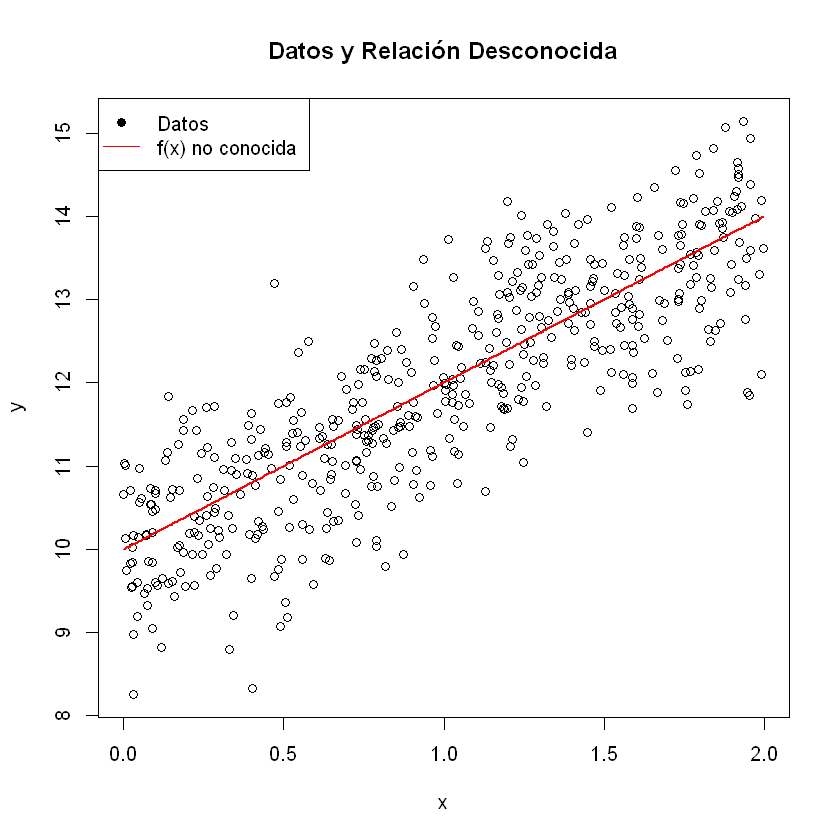

In [1]:
#Creemos el conjunto de datos
set.seed(081125)
n = 500
x = sort(runif(n, min = 0, max = 2))
fx = 10 + 2*x
y = fx + rnorm(n, sd=0.8)
datos <- as.data.frame(cbind(y, x))

plot(x, y, main = "Datos y Relación Desconocida")
lines(x, fx, col = "red", lwd=2)
legend(x = "topleft", legend=c("Datos", "f(x) no conocida"), col = c("black", "red"), pch = c(19,NA), lty = c(NA, 1))

El econometrista decide usar el siguiente modelo para estudiar la relación entre $x$ y $y$:

$$y_i = \beta_0 + \beta_1 x_i + u_i$$

A continuación presentamos la estimación de este modelo a partir del método de mínimos cuadrados ordinarios (MCO):

In [2]:
model <- lm(y ~ x, data = datos)

#Coeficiente b0
b0 <- model$coefficients[1]
#Coeficiente b1
b1 <- model$coefficients[2]
print(paste0('Estimaciones de MCO: ', 'b0 = ', round(b0, 3), ' , b1 = ', round(b1, 3)))

#Prediccion
model_fit <- as.data.frame(predict(model, se.fit = TRUE, , interval = "confidence",  data = datos, level = 0.99))
names(model_fit) <- c('yhat', 'lwr', 'upr', 'se', 'df', 'residuals')
head(model_fit, 5)

[1] "Estimaciones de MCO: b0 = 9.915 , b1 = 2.019"


,yhat,lwr,upr,se,df,residuals
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,9.915539,9.744649,10.08643,0.06608924,498,0.7483613
2,9.917544,9.746783,10.08831,0.06603975,498,0.7483613
3,9.922188,9.751723,10.09265,0.06592522,498,0.7483613
4,9.923880,9.753523,10.09424,0.06588350,498,0.7483613
5,9.933702,9.763970,10.10343,0.06564151,498,0.7483613


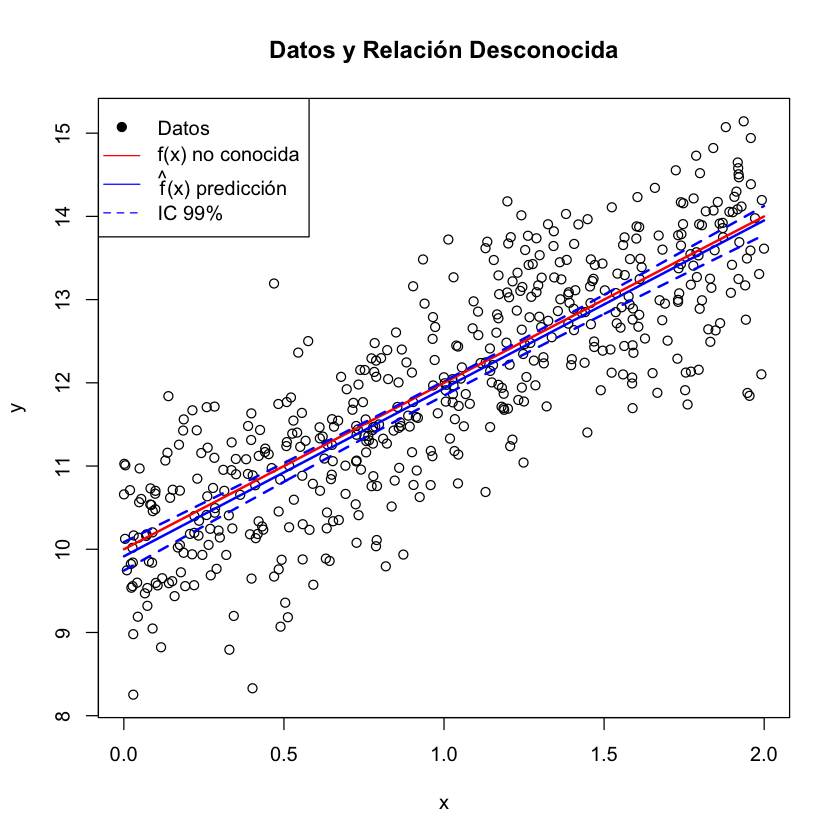

In [7]:
plot(x, y, main = "Datos y Relación Desconocida")
lines(x, fx, col = "red", lwd=2)
#Prediccion
lines(x, model_fit$yhat, col = "blue", lwd=2, lty = 1)
#Intervalos de Confianza
lines(x, model_fit$lwr, col = "blue", lwd=2, lty = 2)
lines(x, model_fit$upr, col = "blue", lwd=2, lty = 2)
legend(x = "topleft", legend=c("Datos", "f(x) no conocida", expression(paste(hat(f), "(x) predicción")), "IC 99%"), 
       col = c("black", "red", "blue", "blue"), pch = c(19,NA,NA,NA), lty = c(NA, 1, 1, 2))

In [8]:
#Tabla de Regresion
summary(model)


Call:
lm(formula = y ~ x, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.39622 -0.48219  0.02633  0.51500  2.33202 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.91466    0.06611  149.97   <2e-16 ***
x            2.01859    0.05777   34.94   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7484 on 498 degrees of freedom
Multiple R-squared:  0.7103,	Adjusted R-squared:  0.7097 
F-statistic:  1221 on 1 and 498 DF,  p-value: < 2.2e-16


Observe que las estimaciones del modelo aproximan bastante bien la función desconocida:

$$\hat\beta_0 = 9.915 \hspace{5pt} \text{ y } \hspace{5pt} \beta_0 = 10$$

$$\hat\beta_1 = 2.019 \hspace{5pt} \text{ y } \hspace{5pt} \beta_1 = 2$$

Más aún, el intervalo de confianza de nuestras estimaciones $\hat f(x_i)$ incluye el verdadero valor de $f(x)$. 

Sin embargo, note que usamos un modelo lineal para estimar una funcion desconocida lineal. Luego, **no es tan sorprendete el buen desempeño de nuestro modelo**.

¿Qué pasa si usamos un modelo lineal para estimar una función no lineal?

## Aplicación: Estimación de Funciones

Suponga ahora que 

$$y = f(x) = \cos(2 \pi x)$$

Nuevamente, el econometrista observa $\{x_i, y_i\}_{i = 1}^n$ con 

$$y_i = f(x_i) + \varepsilon_i, \text{ donde } \varepsilon_i \sim N(0, 0.64)$$

El modelo que el econometrista decide usar tiene la siguiente forma funcional:

$$y_i = \sum_{j = 0}^k \beta_j x_i^j = \beta_0 + \beta_1 x_i + ... + \beta_k x_i^k$$

Es decir, vamos a usar un modelo lineal (en parámetros) para tratar de aproximar una función no lineal.

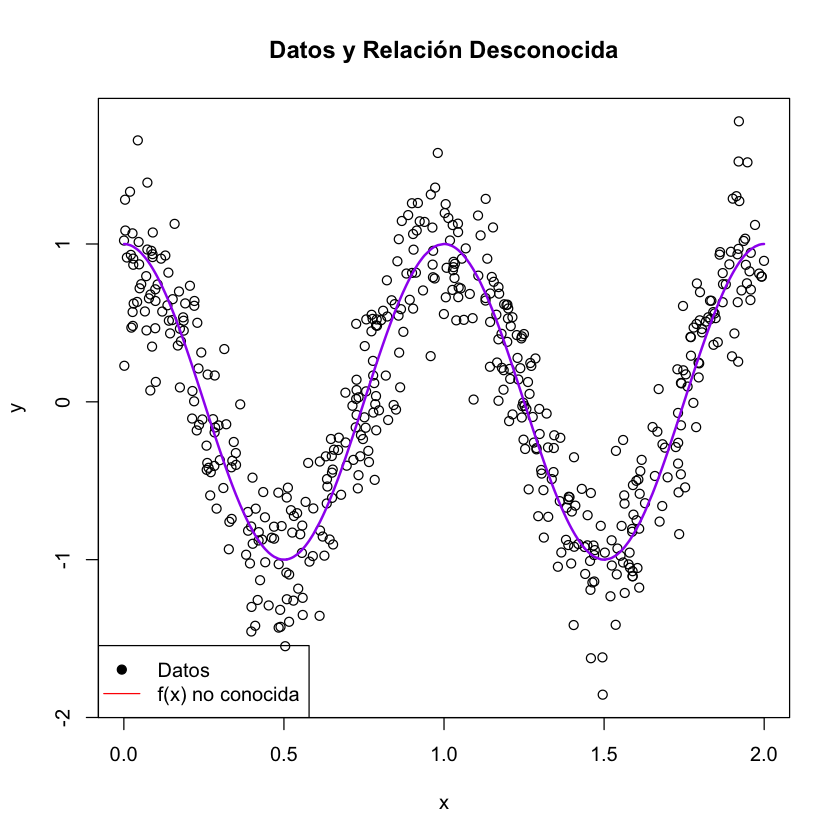

In [9]:
fx = cos(2*pi*x) 
y = fx + rnorm(500, sd=0.3)

plot(x, y, main = "Datos y Relación Desconocida")
lines(x, fx, col = "purple", lwd=2)
legend(x = "bottomleft", legend=c("Datos", "f(x) no conocida"), col = c("black", "red"), pch = c(19,NA), lty = c(NA, 1))

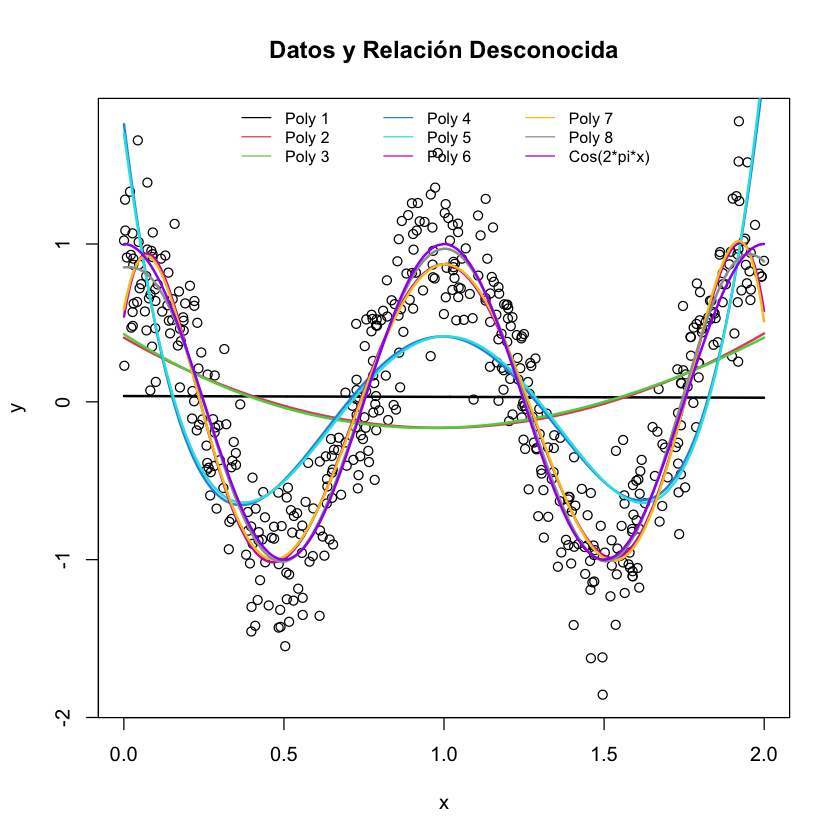

In [10]:
plot(x, y, main = "Datos y Relación Desconocida")
legend <- length(8)
for(degree in 1:8){
  fm = lm(y~poly(x, degree))
  lines(x,predict(fm), col=degree, lwd=2)
  legend[degree] <- paste0("Poly ", degree)
}

lines(x, fx, col = "purple", lwd=2)
legend("top", c(legend, "Cos(2*pi*x)"), lwd=1, col=c(1:8, "purple"), ncol=3, bty="n",cex=0.8, pt.cex=0.8)

Observe que cuando el grado del polinomio incrementa, nuestro modelo ajusta mejor los datos y la función desconocida.

<div class="alert alert-block alert-danger"> 
<b>Nota:</b>
<p>

Luego veremos que es importante estimar modelos simples o *parsimoniosos*.
    
En nuestro ejemplo, el modelo es más complejo cuando incrementamos el orden del polinomio. La teoría económica usualmente nos guia para seleccionar el grado del polinomio.

</div>

## Aplicación: Retornos a la Educación

A principios de la década de 1960 se desarrolló la idea de que la educación y el entrenamiento son inversiones (en capital humano) que incrementan la productividad del trabajador.

Para estimar los retornos a la educación, Jacob Mincer partió de los siguientes supuestos:

- las personas deciden educarse hasta el punto en que se **maximiza el valor presente de sus ganancia futuras**.

- el **costo de la educación** es equivalente al ingreso no persivido durante el proceso educativo y los costos directos por educarse. 

- los ingresos incrementan proporcionalmente con la experiencia (debido al entrenamiento-en-el-trabajo).

Partiendo de estos supuestos Mincer mostró que el salario entre dos individuos con $s$ y $s + 1$ años de educación incrementa proporcionalmente a $e^r$, donde $r$ es la tasa interna de retornos a la educación.

En otras palabras, Mincer determinó que los salarios incrementan a partir de la siguiente función:

$$w(s) = e^{\alpha + rs} = w(0) \cdot e^{rs}$$

<div class="alert alert-block alert-info">
<b>Nota:</b>
<p>

Note la similitud con la ecuacion del interés compuesto $V_f = V_i \left( 1 + \frac{r}{n} \right)^{nt} \overset{n \to \infty}{\longrightarrow} V^i \cdot e^{rt}$

</div>

Observe que podemos log-linearlizar la ecuación del salario y usar datos de la forma $\{w_i, s_i\}_{i = 1}^n$ para estimar la siguiente regresión:

$$\log w = \alpha + r \cdot s$$

Donde los parámetros de interés son $\alpha$ y $r$.

Una extensión de la ecuación anterior es 

$$\log w = \alpha + r \cdot s + \beta_1 x + \beta_2 x^2$$

Donde $x$ es la experiencia laboral potencial del trabajador, la cual se supone tiene rendimientos decrecientes. Es decir, $\beta_1 > 0$ y $\beta_2 < 0$